# <span style="color:darkblue"> Lecture 11 (Optional): Regression Output </span>

<font size = "5">

This is an optional lecture file

- This is only recommended if you've taken statistics courses 
- This lecture will not be formally evaluated
- Keep this in material in mind for future courses


# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [3]:
%pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 2.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col


# <span style="color:darkblue"> II. Generate Simulated Data </span>

<font size = "5">

Create an empty dataset

In [6]:
# Create a new dataset
dataset = pd.DataFrame([])

<font size = "5">

Create three random variables of size ($n = 100$)

In [8]:
# Assign the columns to the dataset
n = 100
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["z"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create discre random variable ($n = 100$)

In [6]:
dataset["d"] = np.random.choice(a = [1,2,3],
                                size = n,
                                p = [0.2,0.2,0.6])

<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x+ e$,</br> 
$ y = 2 + 5 x + e$

In [9]:
# We can compute formulas directly over dataset columns
dataset["y"] =2 + 5* dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [11]:
dataset["p"] = 2 + 5*dataset["x"]

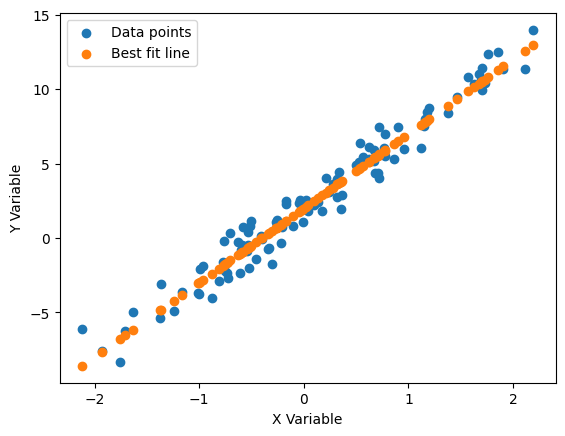

In [13]:
# Plot the scatter plot showing the true data points and the fit line
plt.scatter(x = dataset["x"], y = dataset["y"])
# Could got the seperate plot by calling it twice
# plt.show()
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


# <span style="color:darkblue"> III. Regression Tables </span>


<font size = "5">

Summaries for univariate regression

In [14]:
# Display to the dataset
display(dataset)

,x,z,e,y,p
0,0.716894,0.568036,-1.529827,4.054642,5.584469
1,1.729807,-0.727714,-0.205282,10.443754,10.649036
2,0.539890,1.253161,1.670037,6.369487,4.699450
3,0.722287,-0.992734,1.855328,7.466765,5.611437
4,0.668940,0.265665,0.571565,5.916263,5.344698
...,...,...,...,...,...
95,-0.738998,0.209536,-0.643397,-2.338388,-1.694991
96,-0.990511,-2.333823,0.871967,-2.080590,-2.952557
97,-1.161452,-0.800972,0.148588,-3.658673,-3.807262
98,0.682489,-0.452737,-1.071291,4.341154,5.412445


In [17]:
# Run the model with multiple variables by using "+"
results_univariate = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")

# The "summary_col" functions produces nice outputs
# We can add notation for significance by setting "stars" to True
print(summary_col(results_univariate,
                  stars = True))


                   y    
------------------------
Intercept      2.0828***
               (0.0982) 
x              5.0026***
               (0.0998) 
R-squared      0.9625   
R-squared Adj. 0.9621   
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


<font size = "5">

Summaries for multivariate regression

In [9]:
# Run the model with multiple variables by using "+"
results_multivariate = smf.ols(formula = 'y ~ x + z',
                               data = dataset).fit(cov = "HC1")
print(summary_col(results_multivariate,
                  stars = True))


                   y    
------------------------
Intercept      1.8952***
               (0.0985) 
x              4.9451***
               (0.1087) 
z              0.0451   
               (0.1018) 
R-squared      0.9565   
R-squared Adj. 0.9556   
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


<font size = "5">

Summaries for multivariate regression + categories

In [10]:
# Run the model with multiple variables by using "+"
# This creates a set of distinct indicator variables for each category
results_multivariate_category = smf.ols(formula = 'y ~ x + C(d)',
                                        data = dataset).fit(cov = "HC1")

# The results are reported with a base category, T.1
print(summary_col(results_multivariate_category,
                  stars = True))


                   y    
------------------------
Intercept      1.9954***
               (0.2304) 
C(d)[T.2]      -0.0588  
               (0.3114) 
C(d)[T.3]      -0.1505  
               (0.2655) 
x              4.9653***
               (0.1099) 
R-squared      0.9566   
R-squared Adj. 0.9552   
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


<font size = "5">

Summaries for multivariate regression + interaction

In [11]:
# Run the model with multiple variables by using "+"
# This creates a set of distinct indicator variables for each category
results_multivariate_interaction = smf.ols(formula = 'y ~ x + z + z:x',
                                        data = dataset).fit(cov = "HC1")

# The results are reported with a base category, T.1
print(summary_col(results_multivariate_interaction,
                  stars = True))


                   y    
------------------------
Intercept      1.9000***
               (0.1003) 
x              4.9403***
               (0.1105) 
z              0.0454   
               (0.1023) 
z:x            -0.0333  
               (0.1156) 
R-squared      0.9565   
R-squared Adj. 0.9552   
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


# <span style="color:darkblue"> IV. Professional Tables </span>


<font size = "5">

Summaries for multiple columns

In [50]:
list_results = [results_univariate,
                results_multivariate,
                results_multivariate_category,
                results_multivariate_interaction]

print(summary_col(list_results,
                  stars = True))



                  y I       y II     y III     y IIII 
------------------------------------------------------
C(d)[T.2]                          -0.0588            
                                   (0.3114)           
C(d)[T.3]                          -0.1505            
                                   (0.2655)           
Intercept      1.8932*** 1.8952*** 1.9954*** 1.9000***
               (0.0979)  (0.0985)  (0.2304)  (0.1003) 
R-squared      0.9564    0.9565    0.9566    0.9565   
R-squared Adj. 0.9559    0.9556    0.9552    0.9552   
x              4.9529*** 4.9451*** 4.9653*** 4.9403***
               (0.1068)  (0.1087)  (0.1099)  (0.1105) 
z                        0.0451              0.0454   
                         (0.1018)            (0.1023) 
z:x                                          -0.0333  
                                             (0.1156) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


<font size = "5">

Summaries for multiple columns (sorted + titled + stats)

In [52]:
# This list inputs the headings of the table
list_headings   = ["Univariate",
                   "Multivariate",
                   "Categorical",
                   "Interaction"]

# This is the list of regressor names (if you want a particular order)
list_regressors = ["x",
                   "z",
                   "z:x",
                   "C(d)[T.2]",
                   "C(d)[T.3]"]

# This is a function that extracts the sample size
# Can use with other summary statistics
# "nobs" is the number of observations
compute_summary = {'N':lambda model: format(int(model.nobs))}

print(summary_col(list_results,
                  stars = True,
                  model_names = list_headings,
                  info_dict={'N':lambda x: format(int(x.nobs))},
                  regressor_order = ["x","z","z:x","C(d)[T.2]","C(d)[T.3]"]))


               Univariate Multivariate Categorical Interaction
--------------------------------------------------------------
x              4.9529***  4.9451***    4.9653***   4.9403***  
               (0.1068)   (0.1087)     (0.1099)    (0.1105)   
z                         0.0451                   0.0454     
                          (0.1018)                 (0.1023)   
z:x                                                -0.0333    
                                                   (0.1156)   
C(d)[T.2]                              -0.0588                
                                       (0.3114)               
C(d)[T.3]                              -0.1505                
                                       (0.2655)               
Intercept      1.8932***  1.8952***    1.9954***   1.9000***  
               (0.0979)   (0.0985)     (0.2304)    (0.1003)   
R-squared      0.9564     0.9565       0.9566      0.9565     
R-squared Adj. 0.9559     0.9556       0.9552      0.9

<font size = "5">

Detailed table

In [49]:
# Detailed Summary
print(results_univariate.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2149.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.80e-68
Time:                        00:43:11   Log-Likelihood:                -138.74
No. Observations:                 100   AIC:                             281.5
Df Residuals:                      98   BIC:                             286.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8932      0.098     19.330      0.0